# Lecture 10 ASTROPY and Spectral Line Data Cubes

## ASTROPY

A community Python Library for:
- Read and writing data, input/output
- Coordinate systems and transforms
- Units and constants
- Processing data

Official references:
* Home page:   http://www.astropy.org/
* Affiliated packages:  http://www.astropy.org/affiliated/
* Developers (git) : http://docs.astropy.org/en/stable/development/workflow/development_workflow.html

Today's notebook, reading and processing astronomincal data in FITS files.

### Astronomical Data

* Images:  FITS files.  (a new file **ngc6503.cube.fits** was added to ```astr288p_2018/data/``` directory
  * **ds9**: http://ds9.si.edu/site/Download.html
    Supports 3D cubes: a 3D slicer comes up autmatically. 

  * **ginga**: https://ginga.readthedocs.io/en/latest/
    Supports 3D cubes, but perhaps not as intuitive as ds9
  * **pyfits**: now incorporated into astropy
  * **WCS**: World Coordinate System. 



## Spectral Line Data Cubes in Astronomy 

In this notebook we will introduce spectral line data cubes in astronomy. 

They are a convenient way to store many spectra at points in the sky. Much like having a spectrum at every pixel in a CCD. 

They normally are presented as a [FITS](https://en.wikipedia.org/wiki/FITS) file, with three coordinates
- Two sky coordinates; typically Right Ascension and Declination
- One spectral coordinate such as the observing frequency (radio telescopes or observatories) or wavelength (optical telescopes). 

When there is a known spectral line for reference this line can be used to calculated a velocity using the doppler effect. For radio data, such as ALMA and the VLA, we often use GHz or MHz. For optical data we often use the Angstrom (the visible range is around 4000 - 8000 Angstrom, or 400 - 800 nm).

### Outline

Introduce the concepts of spectral line data cubes and basics in image processing by investigating the NGC 6503 galaxy using observations of neutral hydrogen $H_I$ radio emmissions from the Very Large Array (VLA) radio observatory.

We will keep it as much "pure python", and not use astronomical units and just work in "pixel" or "voxel" space.

**Main Goal:** 
- Build on lecture on images
- Definition of image cube
- Data representation of image cube
- Introduction to galaxy rotating disks


## Spectral Line Data Cubes

![Example Cube](../data/cube_dims_and_cell.png "just an example cube")

The file ```../data/ngc6503.cube.fits``` contains observations of neutral hydrogen $H_I$ 21 cm (1420.4 MHz) radio emmissions from the VLA. Each frequency within the data cube represents $H_I$ at specefic velocity. _Sweeping_ through frequency space provides an overall veiw of the abundance and motion of $H_I$ within a portion of the sky.

**Recall Doppler effects**
$$ V = \frac{\nu^2_0-\nu^2}{\nu^2_0+\nu^2}c $$

Where $V$ is the line-of-sight velocity, $\nu_0$ is the rest frequency, $\nu$ is the sky frequency and $c$ is the speed of light. 

In astronomy the above can be simplified and the radio velocity ($V^{radio}$) can be approximated by
$$ V^{radio} = \frac{\nu_0-\nu}{\nu_0}c=\frac{\lambda-\lambda_0}{\lambda}c$$

Blueshift, objects moving towards an observer will be blueshifted. 

Redshift, objects moving away from an observer will be redshifted.



---

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Reading the data
The [astropy](http://www.astropy.org/) package has an I/O package to simplify reading and writing a number of popular formats common in astronomy. 

In [2]:
import numpy as np
from astropy.io import fits

In [3]:
#Open up the fits file like we did in the previous lecture;
hdu = fits.open('../data/ngc6503.cube.fits')
print(len(hdu))
for HDU in hdu:
    print(HDU)

2


---
A FITS file consists of a series of Header-Data-Units (HDU). Usually there is only one, representing the image. But this file has two. For now, we're going to ignore the second, which is a special table and in this example happens to be empty anyways.  Each HDU has a header, and data.  The data in this case is a numpy array, and represents the Spectral Line Data Cube (images).

---

In [4]:
# header information
h = hdu[0].header
#data
d = hdu[0].data

print('Header')
print(type(h))
print('------')
print('Data')
print(d.shape, d.dtype) 



Header
<class 'astropy.io.fits.header.Header'>
------
Data
(1, 89, 251, 371) >f4


From the shape of ```d``` (1, 89, 251, 371) we can see this image is  4 dimensional; although the 4th dimension is dummy.  There are 371 pixels along X, 251 along Y, and 89 slices or spectral channels. 


---
## The header 

The header behaves like a python dictionary and contains information regarding the data cube. In this case the header follows the convention of the [World Coordinate System (WCS)](https://fits.gsfc.nasa.gov/fits_wcs.html). There are four papers regarding WCS including a description of the WCS for [spectral coordinates in Fits](http://www.atnf.csiro.au/people/mcalabre/WCS/scs.pdf).

### Python Dictionaries

A versatile data type that maps unique _keys_ to _values_. A dictionary _key_ can be any be almost any Python type but are typically numbers or strings and acts as the dictionary _index_. A dictionary value can be any arbitrary Python object. 

Dictionaries are created using curly braces ```{ }``` and values can be assigned and accessed using square brackets ```[ ]```. 

In [5]:
# what's a python dictionary?
music_dict = {}
music_dict['band_names'] = np.array(['Barenaked Ladies', 'Cake' ])
music_dict['members'] = np.array([['Ed Robertson', 'Tyler Stewart', 'Kevin Hearn', 'Jim Creeggan'],
                         ['John McCrea', 'Vince DiFiore', 'Xan McCurdy', 'Gabe Nelson', 'Paulo Baldi'],
                         
                        ])
music_dict['year_started'] = np.array([1988, 1991])

#accessing the dictionary
for key in music_dict.keys():
    print(key, music_dict[key])
    print( )
print()


for band in music_dict['band_names']:
    print(band)
    for key in music_dict.keys():
        if key != "band_names": #skip printing the band name, because we've already done it!
            contents = music_dict[key]           
            print(key, contents[music_dict['band_names'] == band])
            
    print()

band_names ['Barenaked Ladies' 'Cake']

members [list(['Ed Robertson', 'Tyler Stewart', 'Kevin Hearn', 'Jim Creeggan'])
 list(['John McCrea', 'Vince DiFiore', 'Xan McCurdy', 'Gabe Nelson', 'Paulo Baldi'])]

year_started [1988 1991]


Barenaked Ladies
members [list(['Ed Robertson', 'Tyler Stewart', 'Kevin Hearn', 'Jim Creeggan'])]
year_started [1988]

Cake
members [list(['John McCrea', 'Vince DiFiore', 'Xan McCurdy', 'Gabe Nelson', 'Paulo Baldi'])]
year_started [1991]



In [6]:
# printing out the header (a python dictionary)
# Note that this member of 'h' is a special function since 'h' is not a pure python dictionary:
print(type(h))
print(h.keys)

<class 'astropy.io.fits.header.Header'>
<bound method Header.iterkeys of SIMPLE  =                    T /                                                
BITPIX  =                  -32 /                                                
NAXIS   =                    4 /                                                
NAXIS1  =                  371 /                                                
NAXIS2  =                  251 /                                                
NAXIS3  =                   89 /                                                
NAXIS4  =                    1 /                                                
EXTEND  =                    T /Tables following main image                     
BLOCKED =                    T /Tape may be blocked                             
OBJECT  = 'NGC6503 '                                                            
TELESCOP= 'VLA     '                                                            
INSTRUME= 'VLA     '                

---
## The Data

In case you were wondering about that 4th redundant axis. In astronomy we sometimes observe more than one type of radiation. Since waves are polarized, we can have up to 4 so called Stokes parameters, describing the waves as e.g. linear or circular polarized radiation.  We will ignore that here, but they are sometimes stored in that 4th dimension. Sometimes they are stored as separate cubes.


In python we can remove that dummy 4th axis, since we are not going to use it any further. It would otherwise just means typing more indices.

In [7]:
# remove redundant dimension
d = d.squeeze()

# print some infor about the data cube
print(d.shape, d.dtype)
print(d.min(), d.max(), d.mean(), np.median(d), d.std())
print("Signal/Noise  (S/N):",d.max()/d.std())

(89, 251, 371) >f4
-0.0031572059 0.01698353 4.7343594e-05 1.3375308e-05 0.0007403539
Signal/Noise  (S/N): 22.939745



It looks like the noise is around 0.00074 (the standard deviation) and a peak value of 0.017.

The signal to noise can be estimted using the max value and standard deviation of the image ~23, so quite strong. There probably is something interesting in this cube!

---

### Plotting some basics

(251, 371)


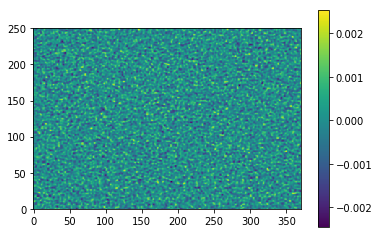

In [8]:
z = 80         # the mystery blob
im = d[z,:,:]  #   im = d[z]     also works
#im = d[z, 50:110, 210:270]
#im = d[z, 100:150, 140:180]
plt.imshow(im,origin=['Lower'])
plt.colorbar()
print(im.shape)

There are 89 channels (slices) in this cube, numbered 0 through 88 in the usual python sense. Pick a few other slices by changing the value in ```z=``` and notice that the first few and last few appear to be just noise and that the V-shaped signal changes shape through the channels. Perhaps you should not be surprised that these are referred to as butterfly diagrams.

In [9]:
# lets define a function that will
#  plot a fiew slices of the cube
#  to get a better idea of the data
def plot_cube(d_im, cs=3):
    '''
    Plot a square of figures from an input image. 
    '''

    z = np.random.random(3**2)
    z = np.rint(z*d.shape[0])

    fig, axes = plt.subplots(cs,cs, figsize=(10,8))
    # Small vertical space between axes
    fig.subplots_adjust(wspace=0.0)
    fig.subplots_adjust(hspace=0.0)

    # loop through axes to plot
    #  each image
    i=0
    for ax in axes.flat:
        pos = z[i].astype(int)
        im  = d_im[pos,:,:]

        im_plt = ax.imshow(im,origin=['Lower'],vmin=d_im.min(),vmax=d_im.max())
        ax.set_title("Spectral Index {:2d} ".format(pos))

        #only keep left and bottom fram axis
        (x,y) = np.unravel_index(i,axes.shape)
        if x !=2:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        if y !=0:
            ax.yaxis.set_major_formatter(plt.NullFormatter())

        i=i+1

    axes[0,0].set_xlim(0,im.shape[1])
    axes[0,0].set_ylim(0,im.shape[0])

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.25, 0.02, 0.5]) #[left,bottom,width,height]
    fig.colorbar(im_plt, cax=cbar_ax)

    plt.show()



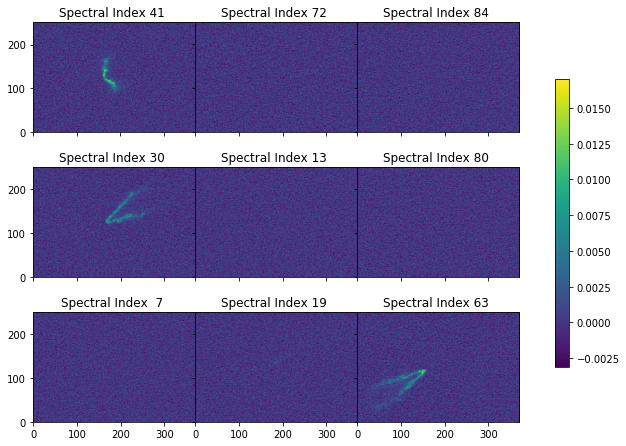

In [10]:
# lets use the function above
#  to have a look at a few images
plot_cube(d,3)


(8287769,)


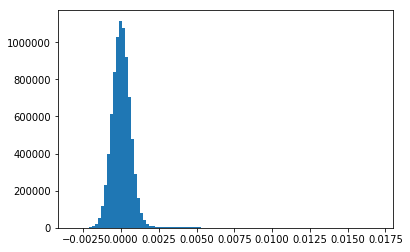

In [11]:
# look at a histogram of all the data (histogram needs a 1D array)
# d1 = d.flatten()          # flatten() makes a copy of the array!
d1 = d.ravel()              # ravel() doesn't make a new copy !!
print(d1.shape)
(n,b,p) = plt.hist(d1, bins=100)

Notice that the histogram is on the left in the plot, and we already saw the maximum data point is 0.0169835.

So let us plot the vertical axis logarithmically, so we can better see what is going on.

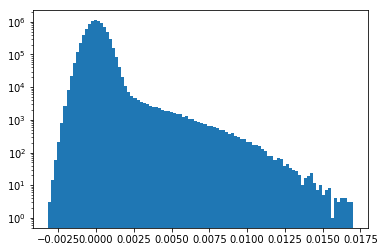

In [12]:
(n,b,p) = plt.hist(d1,bins=100,log=True)

6.696843e-05 0.00083680084


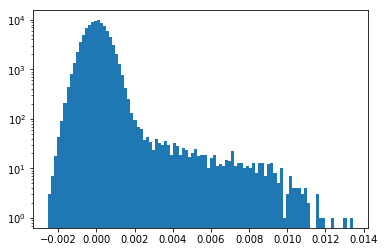

In [13]:
# pick a slice and make a histogram and print the mean 
# and standard deviation of the signal in that slice
z=47
imz = d[z,:,:].flatten()
(n,b,p) = plt.hist(imz,bins=100,log=True)
print(imz.mean(), imz.std())


**Exercise** : observe by picking some values of **z** that the noise seems to vary a little bit from one end of the band to the other.  Store the noise in channel 0 and 88 in variables sigma0 and sigma88:


In [14]:
# noise in channel 0

# noise in chanel 88


### How do we _observe_ the entire image?

Each spectral index provides observations of neutral hydrogen $H_I$ observed at that frequency or velocity. 

Summing the spectral cube over the spectral index will provide a _more complete_ view of $H_I$. 

This is the zero'th moment.

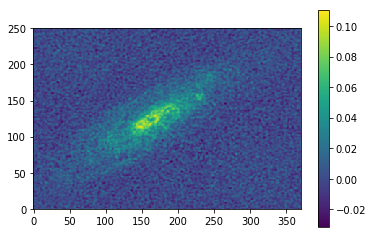

In [15]:
im_t = d.sum(axis=0)
plt.imshow(im_t,origin=['Lower'])
plt.colorbar()


In the above we can see we are working with an image of a galaxy and in particular NGC 6503 though. However the image is quite noisey. Are there ways that we can fix this? 

**Note** we said a _more complete_ because we are working in pixel/voxel space and we still haven't considered proper units.

---

## Smoothing a cube to enhance the signal to noise

In [16]:
import scipy.signal
import scipy.ndimage.filters as filters

Original Image:
rms: 0.00055829244
mean: -1.2134018e-06
min: -0.0022829054
max: 0.002323448

Smoothed Image: 0.00018632467 -1.2134019e-06
rms: 0.00018632467
mean: -1.2134019e-06
min: -0.001132566
max: 0.00091950654


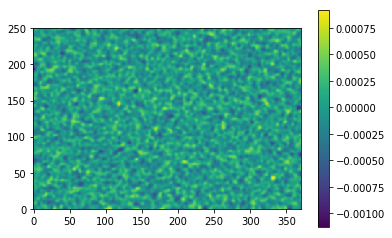

In [17]:
z = 0
sigma = 2.0
ds1 = filters.gaussian_filter(d[z],sigma)      # ds1 = smoothed slice


plt.imshow(ds1,origin=['Lower'])
plt.colorbar()

print("Original Image:")
print("rms:",d[z,:,:].flatten().std())
print("mean:",d[z,:,:].flatten().mean())
print("min:",d[z,:,:].flatten().min())
print("max:",d[z,:,:].flatten().max())
print()
print("Smoothed Image:", ds1.std(),ds1.mean())
print("rms:",ds1.std())
print("mean:",ds1.mean())
print("min:",ds1.flatten().min())
print("max:",ds1.flatten().max())

Notice that the noise is indeed lower than earlier.

So far we have smoothed a single slice; to reduce the noise of the entire image we need to smooth the whole cube. We can do this by smoothing each slice with sigma, or optionally smooth in the spectral dimension a little bit. 

0.0001317801
Origninal Image
max: 0.01698353
min: -0.0031572059
rms: 0.0007403539
S/N: 22.939745

Smoothed Image
max: 0.010925961
max: -0.00070706994
rms: 0.0004115653
S/N: 26.547333


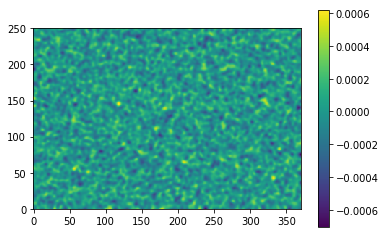

In [18]:
ds = filters.gaussian_filter(d,[1.0,sigma,sigma])  # ds is a smoothed cube 
plt.imshow(ds[z],origin=['Lower'])
plt.colorbar()
print(ds[z].std())

print("Origninal Image")
print("max:",d.max())
print("min:",d.min())
print("rms:",d.std())
print("S/N:",d.max()/d.std())
print()
print("Smoothed Image")
print("max:",ds.max())
print("max:",ds.min())
print("rms:",ds.std())
print("S/N:",ds.max()/ds.std())


Notice that, although the peak value was lowered a bit due to the smoothing, the signal to noise has increased from the original cube. So, the signal should stand out a lot better.

**Exercise** : Observe a subtle difference in the last two plots. Can you see what happened here?

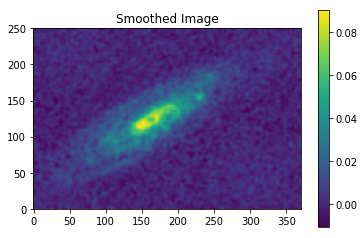

In [19]:
mom0s = ds.sum(axis=0)
plt.imshow(mom0s,origin=['Lower'])
plt.title('Smoothed Image')
plt.colorbar();

---

## Masking a cube to enhance signal

Masking an image can also help to enhance the signal by _ignoring_ data which is below a certian amplitude.


In [20]:
import numpy.ma as ma

In [21]:
#  sigma0 is the noise in the original cube
sigma0 = d[0:5,:,:].std()
nsigma = 5.0
dm = ma.masked_inside(d,-nsigma*sigma0,nsigma*sigma0)
print(dm.count())


49578


PEAK at location: 149 113 42072


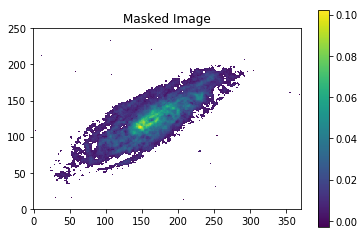

In [22]:
mom0 = dm.sum(axis=0)
plt.imshow(mom0,origin=['Lower'])
plt.colorbar()
plt.title("Masked Image")
#
(ypeak,xpeak) = np.unravel_index(mom0.argmax(),mom0.shape)
print("PEAK at location:",xpeak,ypeak,mom0.argmax())

---

## Velocity fields

The mean velocity is defined as the first moment

$$ <V> = {\Sigma{(v \cdot I)} \over \Sigma{(I)} }$$

Because we are working in pixel/voxel space we do not have an exact representation of $v$ but we do know that $v$ is related to frequency and hence the z dimension.

MIN and MAX -925832.096554618 302361.32862007106


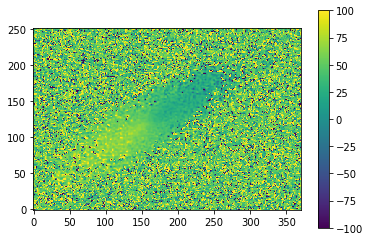

In [23]:
nz = d.shape[0] # number of channels
vchan = np.arange(nz).reshape(nz,1,1) # create an array of channels 0-89, other dimensions 1 for broadcasting

# numerator
vsum = vchan * d
# fraction
vmean = vsum.sum(axis=0)/d.sum(axis=0)

# plot velocities
print("MIN and MAX",vmean.min(),vmean.max())
plt.imshow(vmean,origin=['Lower'],vmin=-100,vmax=100)
#plt.imshow(vmean,origin=['Lower'])
plt.colorbar();

Although we can recognize an area of coherent motions (the red and blue shifted sides of the galaxy), there is a lot of noise in this image. 

Looking at the math, we are dividing two numbers, both of which can be noise, so the outcome can be "anything" (division of small and pseudo random numbers).  

If anything, it should be a value between 0 and 88, so we could mask for that and see how that looks.

Smoothing can also reduce the noise.

Min and Max -379739.29900688125 1023678.6376466254


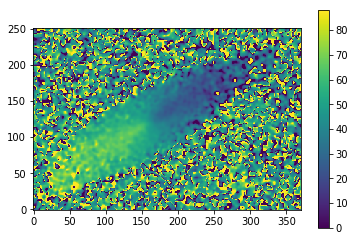

In [24]:
nz = ds.shape[0] # number of channels in smoothed array
vchan = np.arange(nz).reshape(nz,1,1) # create an array of channels 0-89, other dimensions 1 for broadcasting

# numerator
vsum = vchan * ds
# fraction
vmean = vsum.sum(axis=0)/ds.sum(axis=0)
print('Min and Max',vmean.min(),vmean.max())
plt.imshow(vmean,origin=['Lower'],vmin=0,vmax=88)
plt.colorbar();

Although more coherent, there are still bogus values outside the image of the galaxy. So we are looking for a hybrid of the two methods, _masked_ and _smoothed_.  

In the smooth cube we saw the signal to noise is a lot better defined, so we will define areas in the cube where the signal to noise is high enough and use those in the original high resolution cube.

2.9684116e-07 0.000105552666


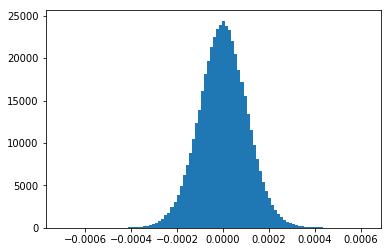

In [25]:
# this is all messy , we need a better solution, a hybrid of the two:
noise = ds[0:5].flatten()
(n,b,p) = plt.hist(noise,bins=100)
print(noise.mean(), noise.std())

In [26]:
sigma0 = noise.std()
nsigma = 5.0
cutoff = sigma0*nsigma
dm = ma.masked_inside(ds,-cutoff,cutoff)    # assumes mean is close to 0
print(cutoff,dm.count())

0.0005277633317746222 186888


In [27]:
dm2=ma.masked_where(ma.getmask(dm),d)

-9.472148232738704 91.77445089623832
(251, 371)


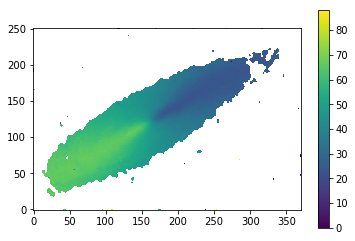

In [28]:
# numerator
vsum = vchan * dm2
# fraction
vmean = vsum.sum(axis=0)/dm2.sum(axis=0)
print(vmean.min(),vmean.max())

# plot velocities
plt.imshow(vmean,origin=['Lower'],vmin=0,vmax=88)
plt.colorbar()
print(vmean.shape)

And voila, now this looks a lot better.

## Papers

The data cube we have used in this notebook has been provided by Eric Greisen (NRAO), his 2009 paper discusses the results in detail: 
http://adsabs.harvard.edu/abs/2009AJ....137.4718G

Data are also available on Greisen's [ftp](ftp://ftp.aoc.nrao.edu/staff/egreisen/)


# Epilogue

Some of the pure python constructs that we discussed here, notably masking and smoothing, become cumbersome. Community developed code exists that makes working with such spectral line image cubes a lot easier. 

[WCS (World Coordinate System)](https://fits.gsfc.nasa.gov/fits_wcs.html) provides a set of coventions to specify the _coordinates_ for each pixel in a multi-dimensional data set; in our case the Spectral Line Data Cube.

This includes:

* Units, the flux unit in radio astronomy is Jy/beam.
* Coordinates, right ascension or declination, etc.
* Conversions, frequency to velocity
* Moment calculations

Four official papers exist for WCS and FITS including one for the [Representations of spectral coordinates in FITS](https://www.aanda.org/articles/aa/pdf/2006/05/aa3818-05.pdf).


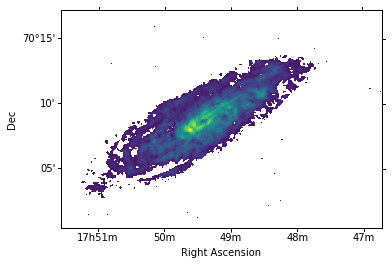

In [29]:
# WCS
from astropy.wcs import WCS

wcs_dat = WCS(hdu[0].header)

fig = plt.figure()
fig.add_subplot(111, projection=wcs_dat,slices=('x','y',48,0))
plt.imshow(mom0, origin='lower')
plt.xlabel('Right Ascension')
plt.ylabel('Dec')

ax = plt.gca()

ra = ax.coords[0]
dec = ax.coords[1]

ra.set_major_formatter('hh:mm')


Text(0,0.5,'Velocities')

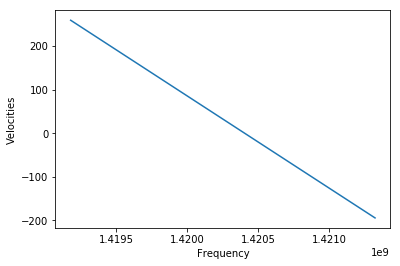

In [30]:
# Frequencies and Velocities
channel = np.arange(d.shape[0])

# get header information for axis 3
cdelt3 = h['CDELT3']
crval3 = h['CRVAL3']
crpix3 = h['CRPIX3']
restfreq=h['RESTFREQ']

# calculate frequencies
freq = (channel-crpix3+1)*cdelt3 + crval3      # at the reference pixel we get the reference value
c = 299792.458
channelv = (1.0-freq/restfreq) * c          # convert to doppler velocity in km/s

plt.plot(freq,channelv)
plt.xlabel('Frequency')
plt.ylabel('Velocities')

**Exercise** can you reproduce the plots in this notebook using correct units?

First moment
$$ I_{H_I} = \Sigma{(I \cdot \Delta v)} $$

where $\Delta v $ is the channel spacing in $^{km}/_{s}$ and $I$ is the flux density in the $i^{th}$ channel in $Jy$ $beam^{-1}$

Second moment
$$ <V> = {\Sigma{(v \cdot I)} \over \Sigma{(I)} }$$

where $<V>$ is the average velocity of the gas at a given pixel and $v$ is the channel velocity.